# Predictive modeling using linear regression:
In the past years, people used to rent movie Disks (DVD) to watch and then get them back to the rental companies, and this habbit still exists now (but not very frequent like before).

In this task we will explore a dataset of DVD rental data in order to predict rental duration for a "ficitonal" movie rental company.
the dataset was downloaded from [Datacamp]() as part of a guided project.

# Dataset struture:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

## Importing and cleaning data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import any additional modules and start coding below
df = pd.read_csv("Data/rental_info.csv")
df.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [2]:
df["rental_date"].min(), df["rental_date"].max()

('2005-05-25 02:53:30+00:00', '2005-08-24 02:50:12+00:00')

In [3]:
# checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_date       15861 non-null  object 
 1   return_date       15861 non-null  object 
 2   amount            15861 non-null  float64
 3   release_year      15861 non-null  float64
 4   rental_rate       15861 non-null  float64
 5   length            15861 non-null  float64
 6   replacement_cost  15861 non-null  float64
 7   special_features  15861 non-null  object 
 8   NC-17             15861 non-null  int64  
 9   PG                15861 non-null  int64  
 10  PG-13             15861 non-null  int64  
 11  R                 15861 non-null  int64  
 12  amount_2          15861 non-null  float64
 13  length_2          15861 non-null  float64
 14  rental_rate_2     15861 non-null  float64
dtypes: float64(8), int64(4), object(3)
memory usage: 1.8+ MB


In [4]:
# convert dates to datetime objects
df["rental_date"] = pd.to_datetime(df["rental_date"], format="mixed")
df["return_date"] = pd.to_datetime(df["return_date"], format="mixed")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   rental_date       15861 non-null  datetime64[ns, UTC]
 1   return_date       15861 non-null  datetime64[ns, UTC]
 2   amount            15861 non-null  float64            
 3   release_year      15861 non-null  float64            
 4   rental_rate       15861 non-null  float64            
 5   length            15861 non-null  float64            
 6   replacement_cost  15861 non-null  float64            
 7   special_features  15861 non-null  object             
 8   NC-17             15861 non-null  int64              
 9   PG                15861 non-null  int64              
 10  PG-13             15861 non-null  int64              
 11  R                 15861 non-null  int64              
 12  amount_2          15861 non-null  float64            
 13  l

In [6]:
# unique values for "special features"
sp_f = df["special_features"].unique()
sp_f

array(['{Trailers,"Behind the Scenes"}', '{Trailers}',
       '{Commentaries,"Behind the Scenes"}', '{Trailers,Commentaries}',
       '{"Deleted Scenes","Behind the Scenes"}',
       '{Commentaries,"Deleted Scenes","Behind the Scenes"}',
       '{Trailers,Commentaries,"Deleted Scenes"}',
       '{"Behind the Scenes"}',
       '{Trailers,"Deleted Scenes","Behind the Scenes"}',
       '{Commentaries,"Deleted Scenes"}', '{Commentaries}',
       '{Trailers,Commentaries,"Behind the Scenes"}',
       '{Trailers,"Deleted Scenes"}', '{"Deleted Scenes"}',
       '{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}'],
      dtype=object)

For the column "special_features" wa can see that some values are repeated, so we can instead include all of the possible values and add boolean flags for each one of them.

In [7]:
lst_features = list(map(lambda x: x.replace("{", "").replace("}", "").split(","), sp_f))
lst_features

[['Trailers', '"Behind the Scenes"'],
 ['Trailers'],
 ['Commentaries', '"Behind the Scenes"'],
 ['Trailers', 'Commentaries'],
 ['"Deleted Scenes"', '"Behind the Scenes"'],
 ['Commentaries', '"Deleted Scenes"', '"Behind the Scenes"'],
 ['Trailers', 'Commentaries', '"Deleted Scenes"'],
 ['"Behind the Scenes"'],
 ['Trailers', '"Deleted Scenes"', '"Behind the Scenes"'],
 ['Commentaries', '"Deleted Scenes"'],
 ['Commentaries'],
 ['Trailers', 'Commentaries', '"Behind the Scenes"'],
 ['Trailers', '"Deleted Scenes"'],
 ['"Deleted Scenes"'],
 ['Trailers', 'Commentaries', '"Deleted Scenes"', '"Behind the Scenes"']]

In [8]:
for i in lst_features:
    for j in i:
        df[j.replace("\"", "").replace(" ", "_").lower()] = df["special_features"].str.contains(j)
df.head(10)

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,trailers,behind_the_scenes,commentaries,deleted_scenes
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False
5,2005-05-29 16:51:44+00:00,2005-06-01 21:43:44+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False
6,2005-06-17 19:42:42+00:00,2005-06-22 20:39:42+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False
7,2005-07-09 18:23:46+00:00,2005-07-13 19:04:46+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False
8,2005-07-27 13:16:28+00:00,2005-07-28 13:40:28+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False
9,2005-08-21 13:53:52+00:00,2005-08-25 09:03:52+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False


for analysis purpose, we will get rating column from dummy data, which will be later dropped in the regression part

In [9]:
# reset dummy
def restore_dummies(df, columns, col_name="res_dummy"):
    df[col_name] = df[columns].idxmax(axis=1)
    return df
restore_dummies(df, ["NC-17", "PG", "PG-13", "R"], "rating")
df["rating"] = df["rating"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   rental_date        15861 non-null  datetime64[ns, UTC]
 1   return_date        15861 non-null  datetime64[ns, UTC]
 2   amount             15861 non-null  float64            
 3   release_year       15861 non-null  float64            
 4   rental_rate        15861 non-null  float64            
 5   length             15861 non-null  float64            
 6   replacement_cost   15861 non-null  float64            
 7   special_features   15861 non-null  object             
 8   NC-17              15861 non-null  int64              
 9   PG                 15861 non-null  int64              
 10  PG-13              15861 non-null  int64              
 11  R                  15861 non-null  int64              
 12  amount_2           15861 non-null  float64    

In [10]:
# dataset general stats
df.describe()

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
count,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000
mean,4.217161,2006.885379,2.944101,114.994578,20.224727,0.204842,0.200303,0.223378,0.198726,23.355504,14832.841876,11.389287
std,2.360383,2.025027,1.649766,40.114715,6.083784,0.403599,0.400239,0.416523,0.399054,23.503164,9393.431996,10.005293
min,0.990000,2004.000000,0.990000,46.000000,9.990000,0.000000,0.000000,0.000000,0.000000,0.980100,2116.000000,0.980100
25%,2.990000,2005.000000,0.990000,81.000000,14.990000,0.000000,0.000000,0.000000,0.000000,8.940100,6561.000000,0.980100
50%,3.990000,2007.000000,2.990000,114.000000,20.990000,0.000000,0.000000,0.000000,0.000000,15.920100,12996.000000,8.940100
75%,4.990000,2009.000000,4.990000,148.000000,25.990000,0.000000,0.000000,0.000000,0.000000,24.900100,21904.000000,24.900100
max,11.990000,2010.000000,4.990000,185.000000,29.990000,1.000000,1.000000,1.000000,1.000000,143.760100,34225.000000,24.900100


In [11]:
# adding duration in days (in this case we get the number of days (and the hours... etc are converted to floats))
seconds_per_day = 60*60*24
df["rental_duration"] = df["return_date"] - df["rental_date"]
df["rental_duration"] = df["rental_duration"].dt.total_seconds() / seconds_per_day
df["rental_duration"]

0        3.865278
1        2.836806
2        7.238889
3        2.100000
4        4.045139
           ...   
15856    6.960417
15857    4.045139
15858    9.102778
15859    8.039583
15860    6.028472
Name: rental_duration, Length: 15861, dtype: float64

In [12]:
# checkingrental dates and release dates coherence
print(all(df["rental_date"].dt.year>=df["release_year"]))
df[df["rental_date"].dt.year<df["release_year"]]

False


,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,...,R,amount_2,length_2,rental_rate_2,trailers,behind_the_scenes,commentaries,deleted_scenes,rating,rental_duration
17,2005-05-25 03:03:39+00:00,2005-06-02 02:12:39+00:00,3.99,2009.0,2.99,156.0,14.99,"{Trailers,""Behind the Scenes""}",0,0,...,0,15.9201,24336.0,8.9401,True,True,False,False,NC-17,7.964583
18,2005-06-17 20:11:08+00:00,2005-06-22 17:01:08+00:00,2.99,2009.0,2.99,156.0,14.99,"{Trailers,""Behind the Scenes""}",0,0,...,0,8.9401,24336.0,8.9401,True,True,False,False,NC-17,4.868056
19,2005-07-06 18:13:45+00:00,2005-07-14 17:35:45+00:00,3.99,2009.0,2.99,156.0,14.99,"{Trailers,""Behind the Scenes""}",0,0,...,0,15.9201,24336.0,8.9401,True,True,False,False,NC-17,7.973611
20,2005-07-27 06:31:15+00:00,2005-07-29 06:52:15+00:00,2.99,2009.0,2.99,156.0,14.99,"{Trailers,""Behind the Scenes""}",0,0,...,0,8.9401,24336.0,8.9401,True,True,False,False,NC-17,2.014583
21,2005-08-17 20:22:05+00:00,2005-08-26 16:34:05+00:00,4.99,2009.0,2.99,156.0,14.99,"{Trailers,""Behind the Scenes""}",0,0,...,0,24.9001,24336.0,8.9401,True,True,False,False,NC-17,8.841667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,2005-08-22 10:49:15+00:00,2005-08-29 09:52:15+00:00,6.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,...,1,48.8601,7744.0,24.9001,True,True,False,True,R,6.960417
15857,2005-07-31 09:48:49+00:00,2005-08-04 10:53:49+00:00,4.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,...,1,24.9001,7744.0,24.9001,True,True,False,True,R,4.045139
15858,2005-08-20 10:35:30+00:00,2005-08-29 13:03:30+00:00,8.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,...,1,80.8201,7744.0,24.9001,True,True,False,True,R,9.102778
15859,2005-07-31 13:10:20+00:00,2005-08-08 14:07:20+00:00,7.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,...,1,63.8401,7744.0,24.9001,True,True,False,True,R,8.039583


We can see that the rental_date sometimes is before the release date (which is illogical), so the rental and return dates should be dropped (we will instead keep rental duration), despite the incoherence of the data, we will keep the analysis without both columns.

In [13]:
df.drop(["rental_date", "return_date"], axis=1, inplace=True)
df

,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,trailers,behind_the_scenes,commentaries,deleted_scenes,rating,rental_duration
0,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False,R,3.865278
1,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False,R,2.836806
2,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False,R,7.238889
3,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False,R,2.100000
4,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,True,True,False,False,R,4.045139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15856,6.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,48.8601,7744.0,24.9001,True,True,False,True,R,6.960417
15857,4.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,24.9001,7744.0,24.9001,True,True,False,True,R,4.045139
15858,8.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,80.8201,7744.0,24.9001,True,True,False,True,R,9.102778
15859,7.99,2009.0,4.99,88.0,11.99,"{Trailers,""Deleted Scenes"",""Behind the Scenes""}",0,0,0,1,63.8401,7744.0,24.9001,True,True,False,True,R,8.039583


# Analysing data:

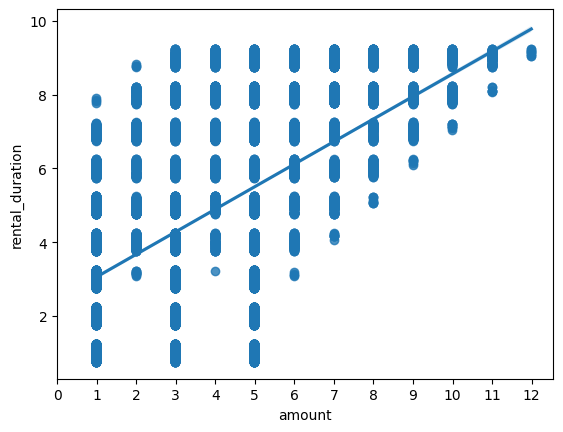

In [14]:
# Visualising rental duration vs amount
sns.regplot(data=df, x="amount", y="rental_duration")
plt.xticks(list(range(13)))
plt.show()

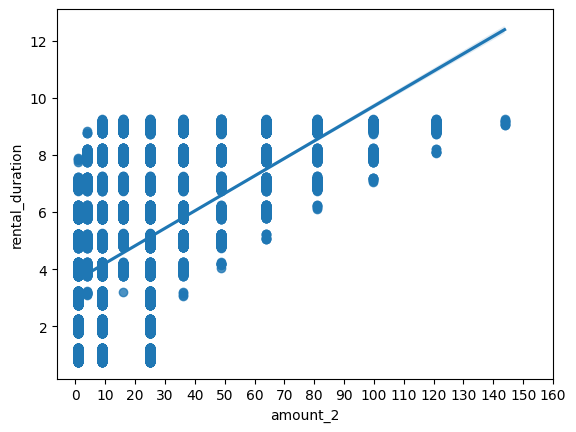

In [15]:
# Visualising rental duration vs amount
sns.regplot(data=df, x="amount_2", y="rental_duration")
plt.xticks(list(range(0, 13**2, 10)))
plt.show()

We can already see that rental duration is longer for more expensive rent prices.

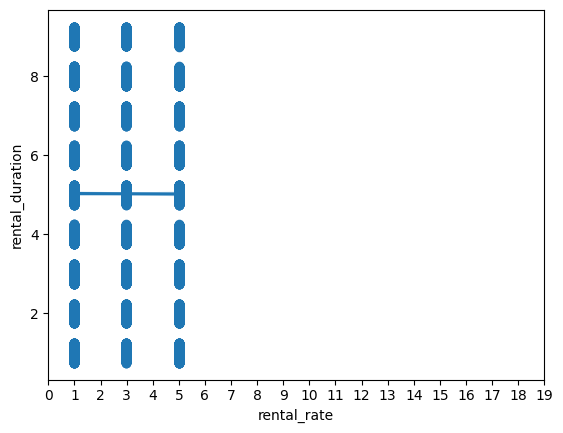

In [16]:
# rental duration vs rental rate
# Visualising rental duration vs amount
sns.regplot(data=df, x="rental_rate", y="rental_duration")
plt.xticks(list(range(20)))
plt.show()

Rental rate does not show much influence on rental durations, but it may have a common influence with rental amount.

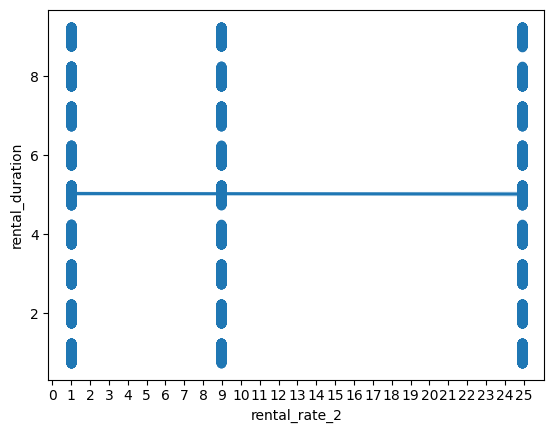

In [17]:
# rental duration vs rental_rate_2
# Visualising rental duration vs amount
sns.regplot(data=df, x="rental_rate_2", y="rental_duration")
plt.xticks(list(range(26)))
plt.show()

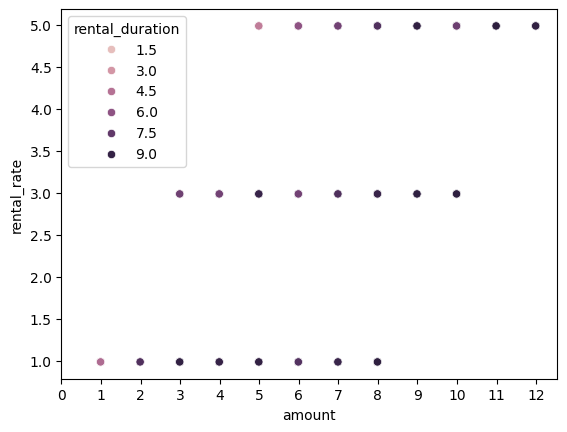

In [18]:
# visualising rental duration vs amount and rate.
# Visualising rental duration vs amount
sns.scatterplot(data=df, x="amount", y="rental_rate", hue="rental_duration")
plt.xticks(list(range(13)))
plt.show()

Most of the influence is caused by the rental amount

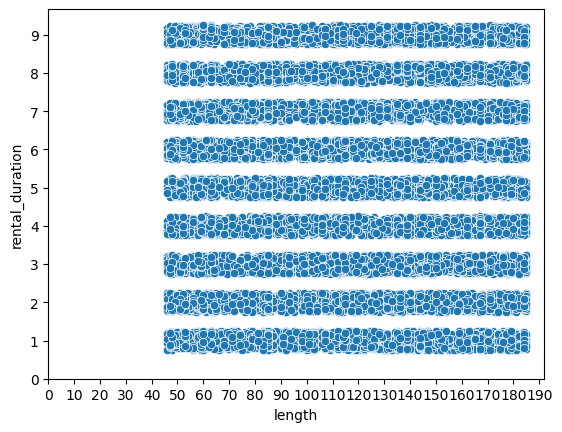

In [19]:
# movie length vs rental duration
sns.scatterplot(data=df, x="length", y="rental_duration")
plt.xticks(list(range(0, 200, 10)))
plt.yticks(list(range(0, 10)))
plt.show()

In [20]:
### Correlation tble
l = [i for i in df.columns if df[i].dtype in [np.int64, np.float64] and i not in ["R", "NC-17", "PG", "PG-13"]]
cor_tbl = df[l].corr()
cor_tbl.style.background_gradient(cmap='coolwarm')

,amount,release_year,rental_rate,length,replacement_cost,amount_2,length_2,rental_rate_2,rental_duration
amount,1.000000,0.021726,0.685870,0.018947,-0.026725,0.956141,0.017864,0.678597,0.557351
release_year,0.021726,1.000000,0.037304,0.031088,0.069991,0.015941,0.030640,0.025106,0.006782
rental_rate,0.685870,0.037304,1.000000,0.055224,-0.064787,0.587627,0.053390,0.982489,-0.001727
length,0.018947,0.031088,0.055224,1.000000,0.026976,0.015765,0.987667,0.051516,-0.004701
replacement_cost,-0.026725,0.069991,-0.064787,0.026976,1.000000,-0.018281,0.029747,-0.065835,0.017151
amount_2,0.956141,0.015941,0.587627,0.015765,-0.018281,1.000000,0.014662,0.596622,0.554728
length_2,0.017864,0.030640,0.053390,0.987667,0.029747,0.014662,1.000000,0.050140,-0.004773
rental_rate_2,0.678597,0.025106,0.982489,0.051516,-0.065835,0.596622,0.050140,1.000000,-0.001742
rental_duration,0.557351,0.006782,-0.001727,-0.004701,0.017151,0.554728,-0.004773,-0.001742,1.000000


We can see that nearly no other numeric column that is correlated to the rental duration column, with that, we will check the categorical values

In [21]:
# rental duration vs. categorical data
# rating
group_rating = df.groupby("rating", as_index=False)["rental_duration"].agg(["mean", "min", "max", "sum", "count", "median"])
group_rating

/tmp/ipykernel_8926/2035119920.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_rating = df.groupby("rating", as_index=False)["rental_duration"].agg(["mean", "min", "max", "sum", "count", "median"])


,rating,mean,min,max,sum,count,median
0,NC-17,5.041426,0.751389,9.248611,30193.102778,5989,5.043056
1,PG,4.987160,0.750000,9.248611,15844.206250,3177,4.993750
2,PG-13,5.078346,0.750000,9.247222,17992.581250,3543,5.063889
3,R,4.973628,0.750694,9.249306,15676.874306,3152,4.991667


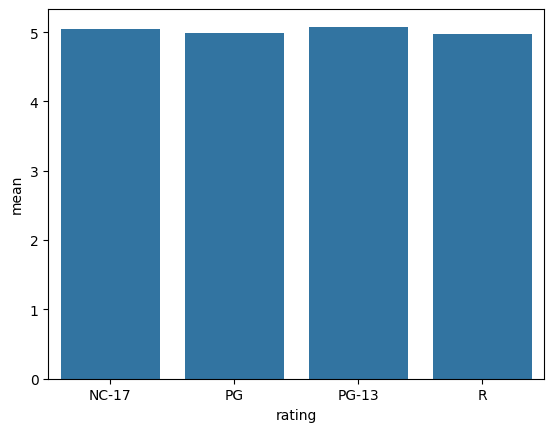

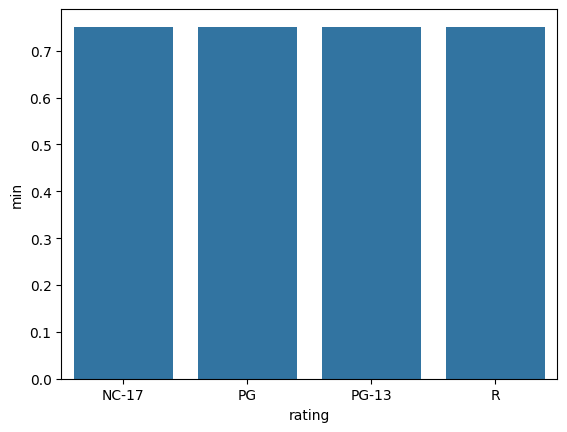

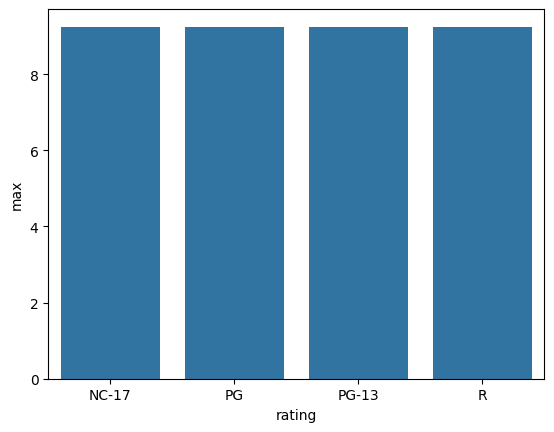

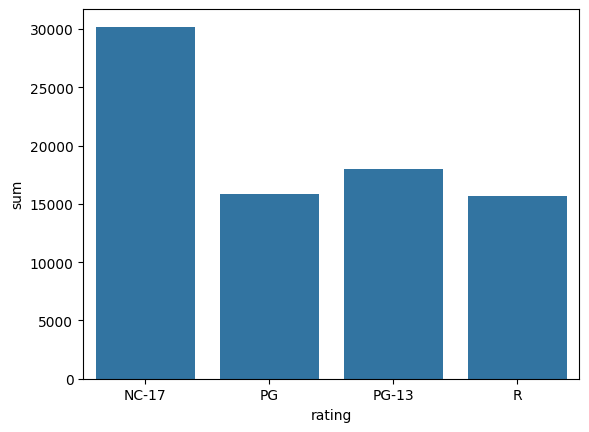

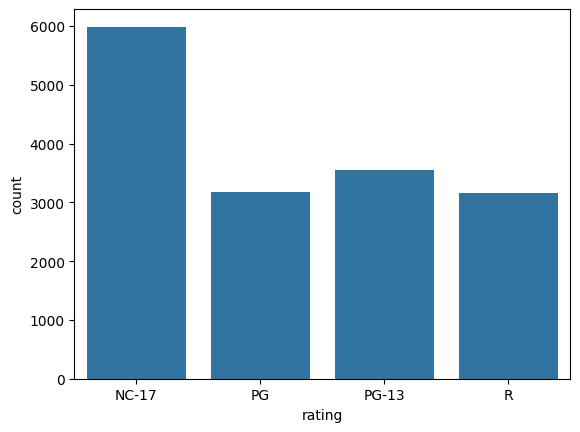

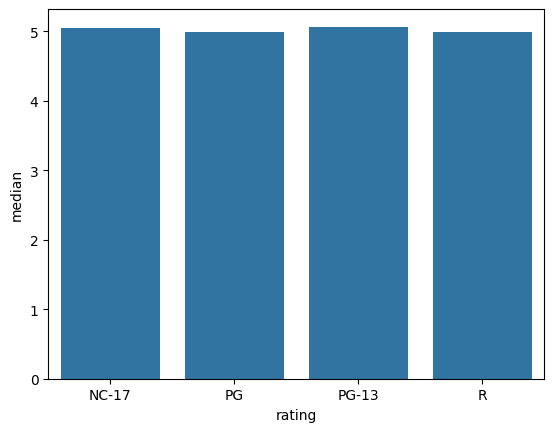

In [22]:
# visualising aggregations vs rating
sns.barplot(data=group_rating, x="rating", y="mean")
plt.show()
sns.barplot(data=group_rating, x="rating", y="min")
plt.show()
sns.barplot(data=group_rating, x="rating", y="max")
plt.show()
sns.barplot(data=group_rating, x="rating", y="sum")
plt.show()
sns.barplot(data=group_rating, x="rating", y="count")
plt.show()
sns.barplot(data=group_rating, x="rating", y="median")
plt.show()

The last plot show an interesting fact that most movies rented have the same rating "NC-17", then "PG-13", then "PG" and "R"

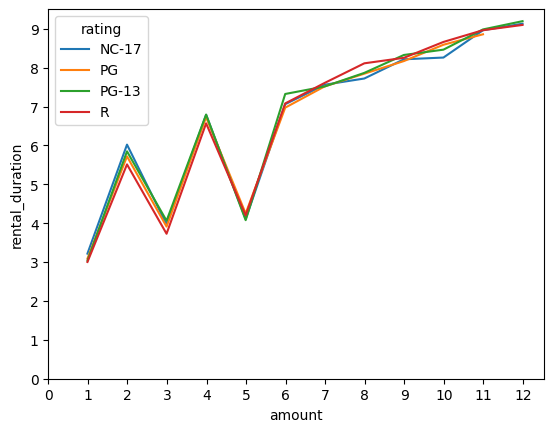

In [23]:
# rating, amount vs duration
# movie length vs rental duration
sns.lineplot(data=df, x="amount", y="rental_duration", hue="rating", errorbar=None)
plt.xticks(list(range(0, 13)))
plt.yticks(list(range(0, 10)))
plt.show()

In [24]:
group_sp_features = df.groupby(["trailers", "behind_the_scenes", "commentaries", "deleted_scenes"], as_index=False)["rental_duration"].agg(["mean", "min", "max", "sum", "count", "median"])
group_sp_features

,trailers,behind_the_scenes,commentaries,deleted_scenes,mean,min,max,sum,count,median
0,False,False,False,True,4.931551,0.758333,9.249306,5044.977083,1023,4.926389
1,False,False,True,False,5.044839,0.751389,9.245833,5493.829167,1089,5.026389
2,False,False,True,True,5.024463,0.760417,9.248611,5079.731944,1011,5.019444
3,False,True,False,False,5.005700,0.750694,9.240972,5546.315278,1108,4.996181
4,False,True,False,True,5.131951,0.762500,9.248611,5311.569444,1035,5.118750
5,False,True,True,False,5.052652,0.751389,9.244444,5446.758333,1078,5.045833
6,False,True,True,True,5.020187,0.763194,9.240972,5527.225694,1101,5.059028
7,True,False,False,False,5.130657,0.751389,9.243750,5843.818750,1139,5.111806
8,True,False,False,True,4.925078,0.753472,9.244444,5156.556250,1047,4.965972
9,True,False,True,False,4.978059,0.755556,9.245139,5620.228472,1129,4.954167


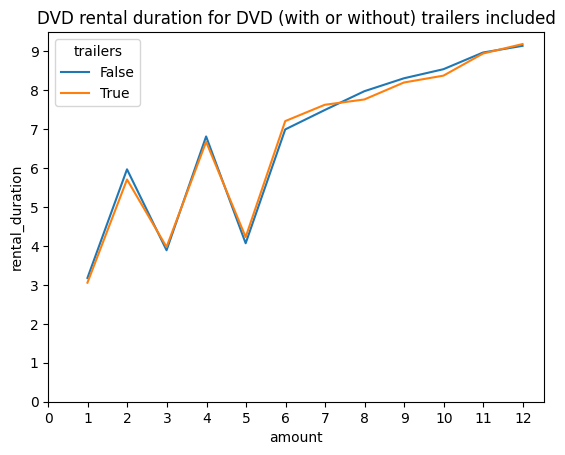

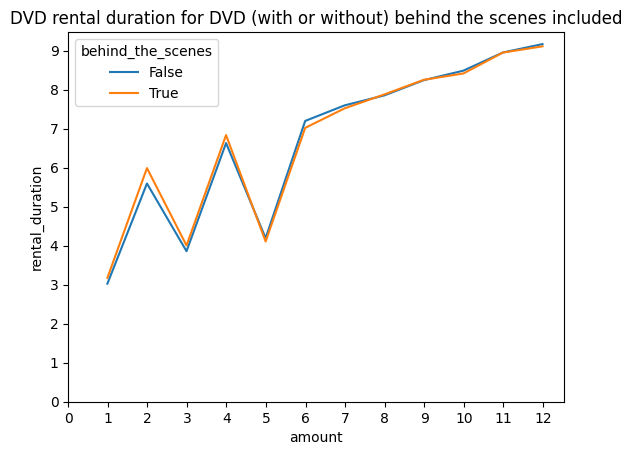

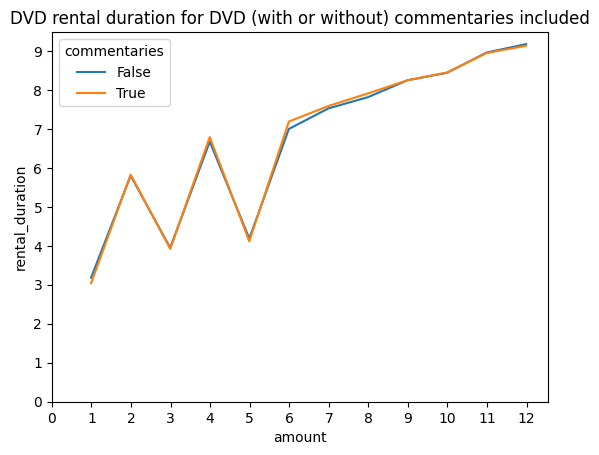

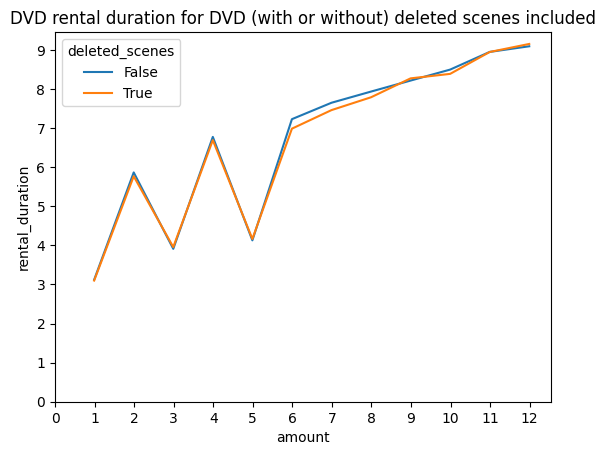

In [25]:
# special features, amount vs duration
for i in ["trailers", "behind_the_scenes", "commentaries", "deleted_scenes"]:
    sns.lineplot(data=df, x="amount", y="rental_duration", hue=i, errorbar=None)
    plt.xticks(list(range(0, 13)))
    plt.yticks(list(range(0, 10)))
    plt.title(f"DVD rental duration for DVD (with or without) {i.replace('_', ' ')} included")
    plt.show()


# Predictions:
Now we can train a machine learning model to predict movie rental durations based on multiple factors.

## Feature selection:
The features that should be included:
- amount
- rating (dummy columns)
- rental_rate (because it is correlated with the amount)
- special features (dummy columns)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = df.drop(["special_features", "rating", "rental_duration"], axis=1).values
y = df["rental_duration"]
X, y

(array([[2.99, 2005.0, 2.99, ..., True, False, False],
        [2.99, 2005.0, 2.99, ..., True, False, False],
        [2.99, 2005.0, 2.99, ..., True, False, False],
        ...,
        [8.99, 2009.0, 4.99, ..., True, False, True],
        [7.99, 2009.0, 4.99, ..., True, False, True],
        [5.99, 2009.0, 4.99, ..., True, False, True]], dtype=object),
 0        3.865278
 1        2.836806
 2        7.238889
 3        2.100000
 4        4.045139
            ...   
 15856    6.960417
 15857    4.045139
 15858    9.102778
 15859    8.039583
 15860    6.028472
 Name: rental_duration, Length: 15861, dtype: float64)

In [27]:
# making a pipeline
scaler = StandardScaler()
reg = make_pipeline(scaler, LinearRegression())
rf = make_pipeline(scaler, RandomForestRegressor())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train.shape, X_test.shape

((12688, 16), (3173, 16))

In [28]:
reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [29]:
y_pred_reg_test = reg.predict(X_test)
y_pred_reg_train = reg.predict(X_train)
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)
res_reg = {
    "train": mean_squared_error(y_train, y_pred_reg_train), 
    "test": mean_squared_error(y_test, y_pred_reg_test), 
}
res_rf = {
    "train": mean_squared_error(y_train, y_pred_rf_train), 
    "test": mean_squared_error(y_test, y_pred_rf_test), 
}
res_reg, res_rf

({'train': 2.6679464449595613, 'test': 2.7060409656165527},
 {'train': 1.254611925042335, 'test': 1.7503254842502534})

## Final training:
re-train the best model on all the data

In [30]:
rf.fit(X, y)
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

res_rf = {
    "train": mean_squared_error(y_train, y_pred_rf_train), 
    "test": mean_squared_error(y_test, y_pred_rf_test), 
}
res_rf

{'train': 1.277627835103293, 'test': 1.2717899882713795}